# Basit Lineer Regresyon ile Ev Boyut-Fiyat Tahimini


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from function import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

veriler = pd.read_csv('house_prices_large.csv')
veriler = np.array(veriler)
print(f'Veriler: \n{veriler},\n'
      f'Verilerin Boyutu: {veriler.shape}')

Veriler: 
[[    296 4751096]
 [     64  989760]
 [    485 7282760]
 ...
 [     61  871629]
 [    480 5190720]
 [    486 9461448]],
Verilerin Boyutu: (1000000, 2)


In [6]:
x=veriler[:,0]
x = (x - x.mean()) / x.std()
y=veriler[:,1]
y = (y - y.mean()) / y.std()
print(f'X Değerleri: {x}, X Değerlerinin Boyutu: {x.shape}')
print(f'Y Değerleri: {y}, Y Değerlerinin Boyutu: {y.shape}')

X Değerleri: [ 0.16018532 -1.6219248   1.61199055 ... -1.64496932  1.573583
  1.61967205], X Değerlerinin Boyutu: (1000000,)
Y Değerleri: [-0.23844873 -1.43599413  0.56759002 ... -1.47360503 -0.09847993
  1.26124722], Y Değerlerinin Boyutu: (1000000,)


In [7]:
X_train, X_test= train_test_split(x, test_size=0.6, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.6 , random_state=42)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')


X_train shape: (400000,), X_test shape: (600000,)
y_train shape: (400000,), y_test shape: (600000,)


In [10]:
w= np.random.rand()
b= np.random.rand()
alpha = 0.5
iteration= 100

w_final, b_final, hist_j = run(X_train, y_train, w, b, linearFunction, costFunction, gradientFunction, alpha, iteration)

Iteration: 0, Cost: 0.1866
Iteration: 10, Cost: 0.1563
Iteration: 20, Cost: 0.1563
Iteration: 30, Cost: 0.1563
Iteration: 40, Cost: 0.1563
Iteration: 50, Cost: 0.1563
Iteration: 60, Cost: 0.1563
Iteration: 70, Cost: 0.1563
Iteration: 80, Cost: 0.1563
Iteration: 90, Cost: 0.1563
Weight: 0.829458881343822, Bias: 0.0004728541461264369
Prediction: -0.6949544839024603, Target: -0.9248353358154008
Prediction: 0.9807489547100239, Target: 0.9226965793813897
Prediction: -0.3062932300797928, Target: 0.31328734012484866
Prediction: -0.10877685518630603, Target: -0.42919261671092407
Prediction: 1.1336648578533686, Target: 1.386408031690025


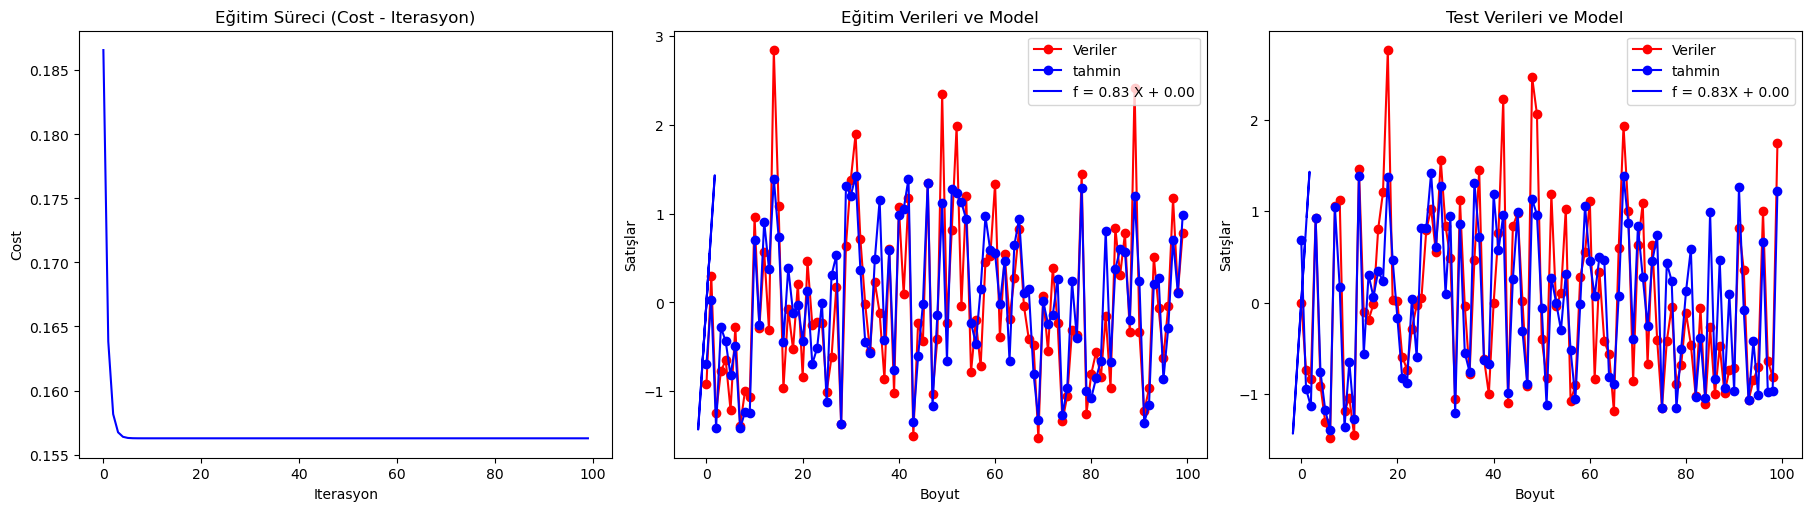

In [11]:
X_train = X_train.flatten()
y_train = y_train.flatten()
X_test = X_test.flatten()
y_test = y_test.flatten()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(18, 5))

ax1.plot(range(len(hist_j)), hist_j, color="blue", linestyle='-')
ax1.set_xlabel('Iterasyon')
ax1.set_ylabel('Cost')
ax1.set_title("Eğitim Süreci (Cost - Iterasyon)")

y_pred_train = linearFunction(X_train,w_final,b_final)

ax2.plot( y_train[:100], color="red", marker='o', label='Veriler')
ax2.plot( y_pred_train[:100], color="blue", marker='o', label='tahmin')
ax2.plot(X_train, linearFunction(X_train, w_final, b_final), color="blue", linestyle='-', label=f"f = {w_final:.2f} X + {b_final:.2f}")
ax2.legend()
ax2.set_xlabel('Boyut')
ax2.set_ylabel('Satışlar')
ax2.set_title("Eğitim Verileri ve Model")

y_pred_test  = linearFunction(X_test, w_final, b_final)

ax3.plot( y_test[:100], color="red", marker='o', label='Veriler')
ax3.plot( y_pred_test[:100], color="blue", marker='o', label='tahmin')
ax3.plot(X_test, linearFunction(X_test, w_final, b_final), color="blue", linestyle='-', label=f"f = {w_final:.2f}X + {b_final:.2f}")
ax3.legend()
ax3.set_xlabel('Boyut')
ax3.set_ylabel('Satışlar')
ax3.set_title("Test Verileri ve Model")

plt.show()

In [14]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("📊 Model Başarı Oranı 📊")
print(f"🔹 Eğitim Verileri:")
print(f"   - MSE: {mse_train:.4f}")
print(f"   - RMSE: {rmse_train:.4f}")
print(f"   - R² Skoru: {r2_train:.4f}")

print(f"🔹 Test Verileri:")
print(f"   - MSE: {mse_test:.4f}")
print(f"   - RMSE: {rmse_test:.4f}")
print(f"   - R² Skoru: {r2_test:.4f}")

📊 Model Başarı Oranı 📊
🔹 Eğitim Verileri:
   - MSE: 0.3125
   - RMSE: 0.5591
   - R² Skoru: 0.6872
🔹 Test Verileri:
   - MSE: 0.3130
   - RMSE: 0.5595
   - R² Skoru: 0.6872
